#train a classifier , $ image: hand-written digit(MNIST)
28*28=784

LogisticRegression clsfier

evaluation metric=confusion matrix

learning curve

plot predictions

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mnist_data = fetch_openml('mnist_784')

In [14]:
x=mnist_data.data
y=mnist_data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
LR=LogisticRegression(penalty='l2', max_iter=100)
LR.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=LR.predict(x_test)

In [35]:
#evaluation
cm=confusion_matrix(y_test,y_pred)
accuracy= accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"F1 Score:{f1_score}")



Accuracy: 0.9178571428571428
F1 Score:<function f1_score at 0x7adf2fdff880>


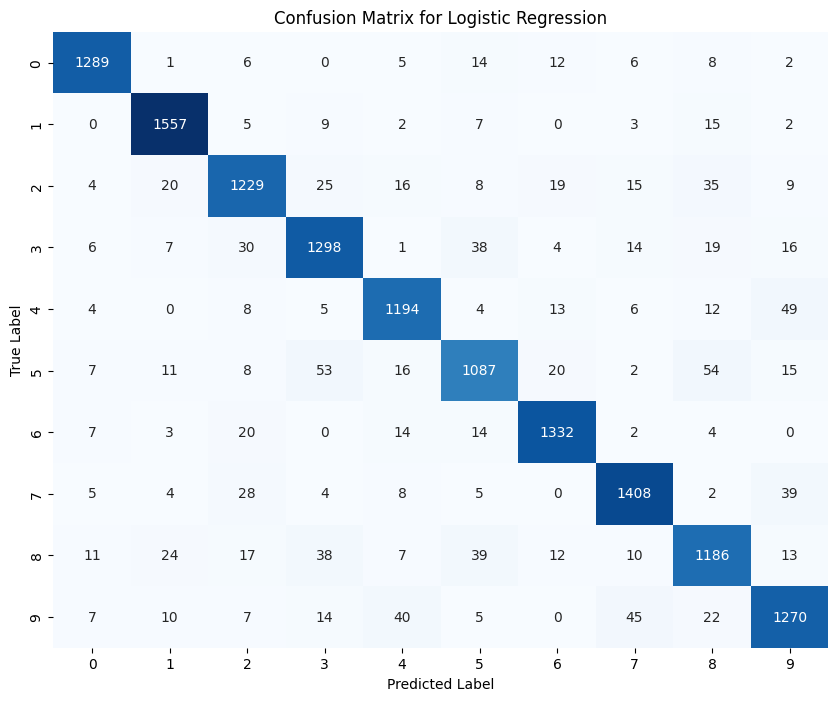

In [39]:
x_test_np = x_test.values
y_test_np = y_test.values.astype(int)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')

plt.show()

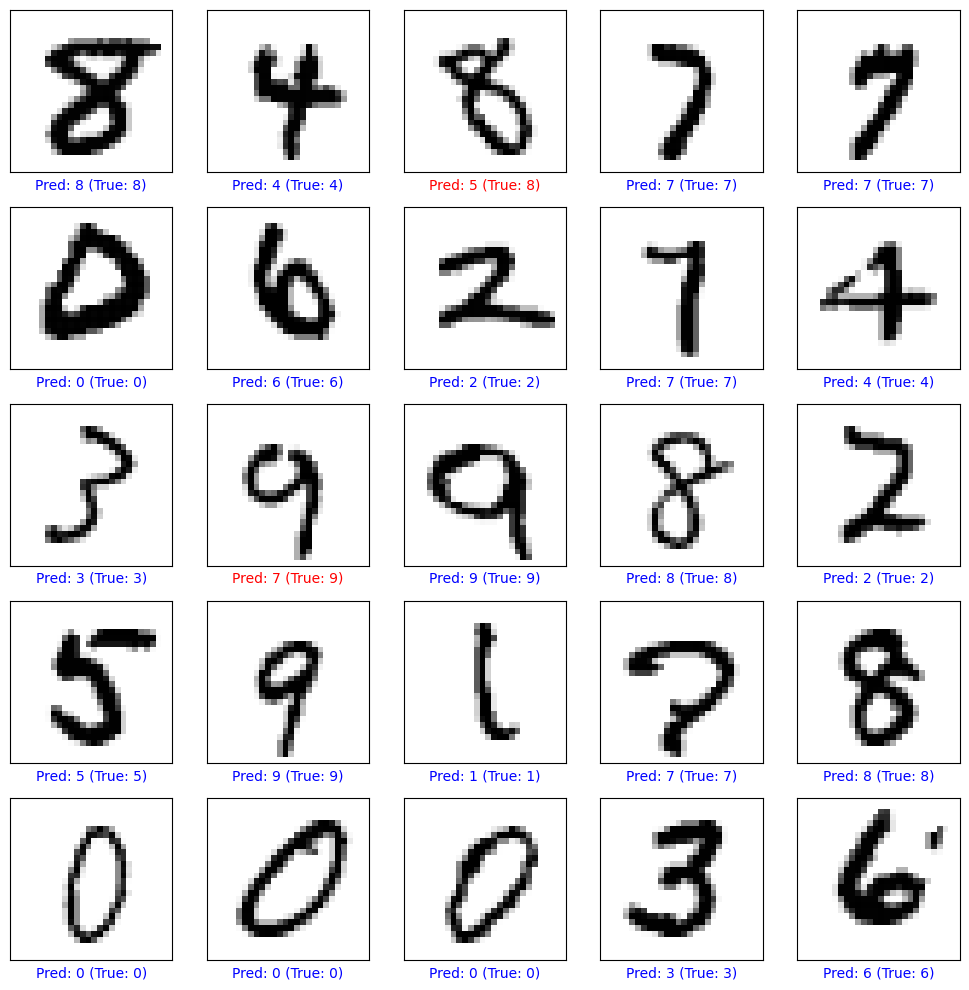

In [42]:
#Plot a few example predictions from the TensorFlow model
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_np[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = y_pred[i]
    true_label = y_test_np[i] # Use the numpy array for true label
    color = 'blue' if int(predicted_label) == int(true_label) else 'red'
    plt.xlabel(f"Pred: {predicted_label} (True: {true_label})", color=color)
plt.tight_layout()
plt.show()

In [44]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)

In [45]:
accuracy= accuracy_score(y_test,svc_pred)
f1_score(y_test,svc_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"F1 Score:{f1_score}")

Accuracy: 0.9764285714285714
F1 Score:<function f1_score at 0x7adf2fdff880>


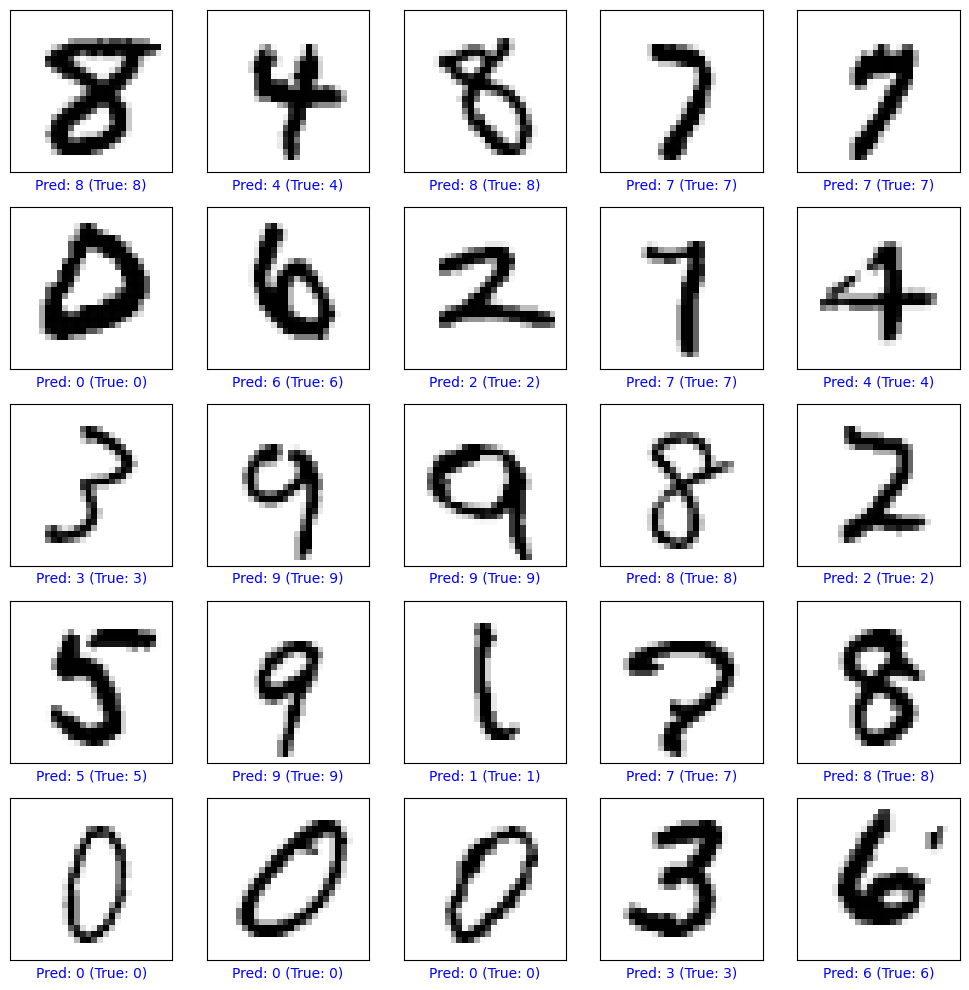

In [46]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_np[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = svc_pred[i]
    true_label = y_test_np[i] # Use the numpy array for true label
    color = 'blue' if int(predicted_label) == int(true_label) else 'red'
    plt.xlabel(f"Pred: {predicted_label} (True: {true_label})", color=color)
plt.tight_layout()
plt.show()

In [49]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)

In [50]:
accuracy= accuracy_score(y_test,rfc_pred)
f1_score(y_test,rfc_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"F1 Score:{f1_score}")

Accuracy: 0.9672857142857143
F1 Score:<function f1_score at 0x7adf2fdff880>


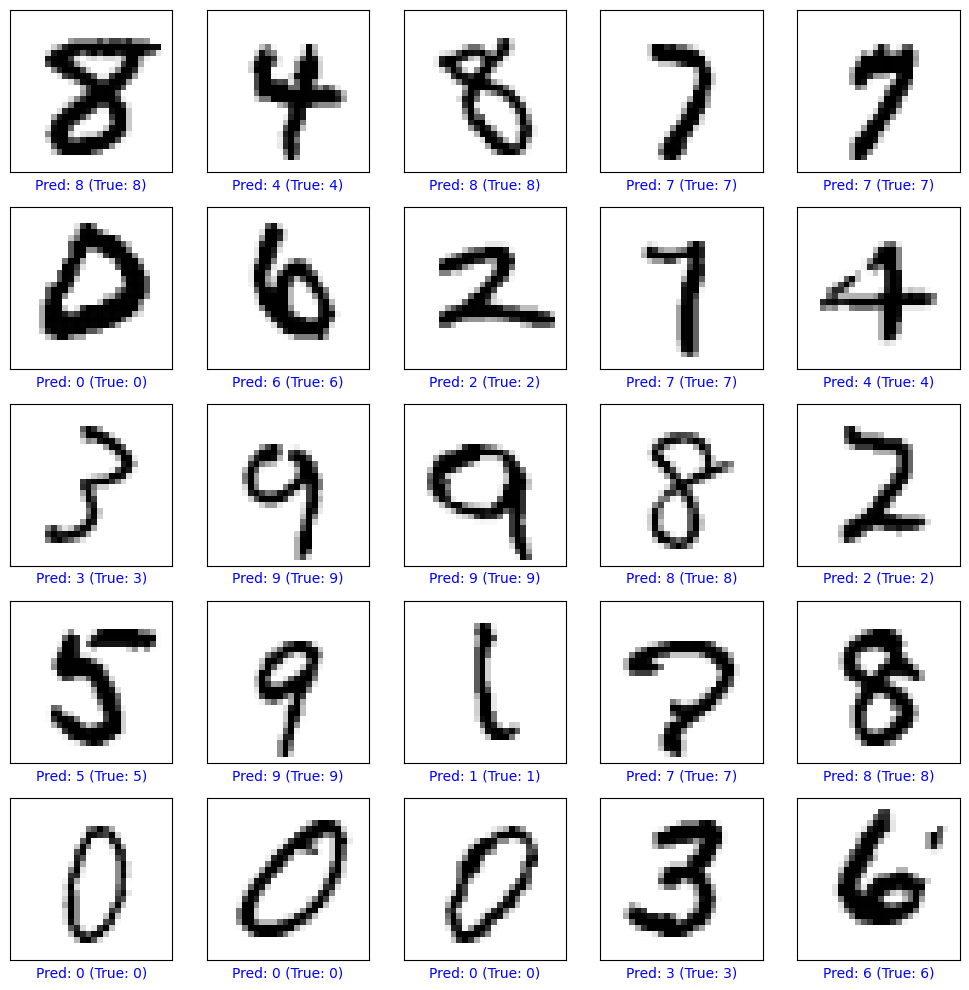

In [51]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_np[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = rfc_pred[i]
    true_label = y_test_np[i] # Use the numpy array for true label
    color = 'blue' if int(predicted_label) == int(true_label) else 'red'
    plt.xlabel(f"Pred: {predicted_label} (True: {true_label})", color=color)
plt.tight_layout()
plt.show()